# Assignment 2

Due Date:  11:59pm on Friday, October 2nd (for now)

## Question 1 - Fitting Part Deux

In the Jupyter Notebook called Fitting_Examples.ipynb, the last few examples considered cases where the uncertainty in the data became
larger at small x-values.  We considered three scenarios for collecting
the data - one where we focused on small x-values, and two others that covered larger ranges of x.

For this question, begin with the Jupyter Notebook above, and modify it
to consider 10 x-value ranges that keep the minimum value of the range constant (and fairly close to zero) while varying the maximum x-value from small to larger values.  For each x-value range, calculate the uncertainty in the y-intercept, and then create a plot of the uncertainty as a function of that maximum x-value of the range.

Now, consider keeping the maximum x-value of the range constant, and vary the minimum value of the range from a small value, close to zero, to a larger value that is close to the maximum value.  Create a plot of the
uncertainty in the y-intercept as a function of the minimum x-value of the range.

What can you conclude from this study about the optimal experiment design?

Coefficients (from curve_fit)
[0.17649198 0.93376007]
Covariance Matrix (from curve_fit)
[[ 0.0455018  -0.00797006]
 [-0.00797006  0.00150913]]

Final Result: y = (0.93 +/- 0.04) x + (0.18 +/- 0.21)


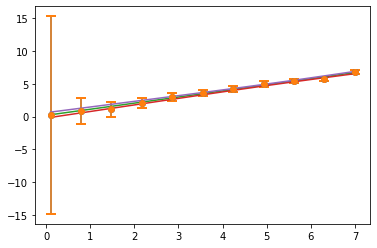

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

npts = 11
xlow = 0.1
xhigh = 7

xl = xlow
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

from scipy.optimize import curve_fit

def fitfunction(x, *paramlist):
    return paramlist[0] + paramlist[1] * x



init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing at constant low-x')

Coefficients (from curve_fit)
[-0.09720624  1.0331326 ]
Covariance Matrix (from curve_fit)
[[ 0.03624749 -0.00634908]
 [-0.00634908  0.0012022 ]]

Final Result: y = (1.03 +/- 0.03) x + (-0.10 +/- 0.19)


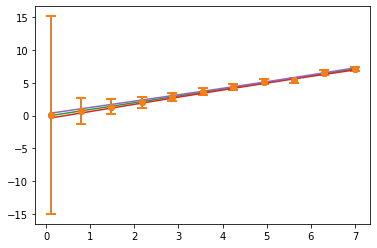

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

npts = 11
xlow = 0.1
xhigh = 7

xl = (xhigh+xlow)/2.0+0.01
xmid = xhigh

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

sigmai = np.array([0.1+ 1.5/np.abs(xi[i]) for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

from scipy.optimize import curve_fit

def fitfunction(x, *paramlist):
    return paramlist[0] + paramlist[1] * x



init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Increasing constant high-x')

For this style of problem, both experiment designs produce a very low
uncertainty. However, keeping lower x-values constant generated a lower
uncertainty by a factor of 0.4. 

## Question 2 - Why is it cold?

Modify the Jupyter Notebook called GlobalTemperatures.ipynb to consider the temperature variations over the year for five locations - two in the northern hemisphere, one near the equator, and two in the southern hemisphere.  Do not use any of the same locations already considered.

What are the scale factors and offsets required to give a reasonable fit in each case?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2


In [5]:
# tilt angle of the earth in 2020
tiltAngle = -23.44*np.pi/180.0

angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

angleNewYork = 49*np.pi/180.0 - angle
angleCairo = 60*np.pi/180.0 - angle
angleSingapore = 89*np.pi/180.0 - angle
angleMacapa = 90*np.pi/180.0 - angle
angleLima = 78*np.pi/180.0 - angle

In [6]:
from Sun import Sun

coords = {'longitude': -75, 'latitude': 40}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionNewYork = dayLength/12.0

coords = {'longitude': 30, 'latitude': 30}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionCairo = dayLength/12.0

coords = {'longitude': 105, 'latitude': 0}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionSingapore = dayLength/12.0

coords = {'longitude': -50, 'latitude': 0}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionMacapa = dayLength/12.0

coords = {'longitude': -75, 'latitude': -10}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionLima = dayLength/12.0

In [7]:
tempNewYorkTheory = (np.cos(angleNewYork)*relPower*np.sqrt(lengthCorrectionNewYork))
tempCairoTheory = (np.cos(angleCairo)*relPower*np.sqrt(lengthCorrectionCairo))
tempSingaporeTheory = (np.cos(angleSingapore)*relPower*np.sqrt(lengthCorrectionSingapore))
tempMacapaTheory = (np.cos(angleMacapa)*relPower*np.sqrt(lengthCorrectionMacapa))
tempLimaTheory = (np.cos(angleLima)*relPower*np.sqrt(lengthCorrectionLima))

print(tempNewYorkTheory.mean())

0.6438095375955833


<ErrorbarContainer object of 3 artists>

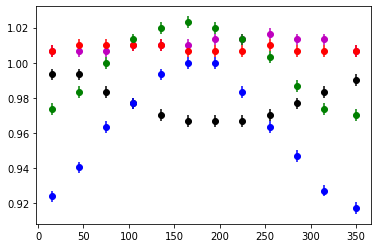

In [8]:
tempNewYork = np.array([4, 6, 11, 18, 22, 27, 29, 29, 24, 18, 13, 7])+273.15
tempCairo = np.array([20, 21, 24, 29, 33, 35, 36, 35, 33, 30, 25, 21])+273.15
tempSingapore = np.array([31, 31, 32, 32, 32, 32, 31, 31, 31, 32, 31, 31])+273.15
tempMacapa = np.array([31, 31, 31, 31, 32, 32, 32, 33, 33, 34, 33, 33])+273.15
tempLima = np.array([26, 27, 27, 24, 22, 20, 19, 19, 19, 20, 22, 24])+273.15

error = np.array([1 for i in range(12)])

mean = tempNewYork.max()
tempNewYork=tempNewYork/mean
tempCairo=tempCairo/mean
tempSingapore=tempSingapore/mean
tempMacapa = tempMacapa/mean
tempLima = tempLima/mean
error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,tempLima,yerr=error,fmt='ko')
plt.errorbar(month,tempMacapa,yerr=error,fmt='mo')
plt.errorbar(month,tempSingapore,yerr=error,fmt='ro')
plt.errorbar(month,tempCairo,yerr=error,fmt='go')
plt.errorbar(month,tempNewYork,yerr=error,fmt='bo')


In this case, the mean of the data that gives the best fit would be calculating the mean from the set of temperatures closest to the equator, and for this set of data, Singapore.

## Question 3 - Kater's Pendulum

Begin with the example Jupyter Notebook called KaterPendulum.ipynb.  Carry out a full analysis of the data obtained in the subdirectory called ~/KaterPendulum/data/scan2.  The file in this directory called kater_scan2_c2.dat will tell you what the x-positions of the small mass were (they are slightly different than in the example we covered in class).

Think about how to "clean" the raw data before proceeding with the fits.

What value of g is the "best" value for this data?  What value of the "fudge factor" offset gives the best comparison of the theory to the data? Is this a reasonable offset?

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#  position of small mass (in cm)
xpos = np.array([1.045, 2.044, 3.012, 4.012, 5.061, 6.011, 7.044])
dxpos = np.array([0.003 for i in range(len(xpos))])

Periodup = 1.99644 +/- 0.00000821
Perioddown = 1.99350 +/- 0.00000855
Periodup = 1.99940 +/- 0.00000790
Perioddown = 1.99729 +/- 0.00000951
Periodup = 2.00225 +/- 0.00000704
Perioddown = 2.00111 +/- 0.00000879
Periodup = 2.00538 +/- 0.00000830
Perioddown = 2.00522 +/- 0.00000694
Periodup = 2.00853 +/- 0.00000815
Perioddown = 2.00923 +/- 0.00000776
Periodup = 2.01135 +/- 0.00000904
Perioddown = 2.01295 +/- 0.00000695
Periodup = 2.01496 +/- 0.00000739
Perioddown = 2.01722 +/- 0.00000901


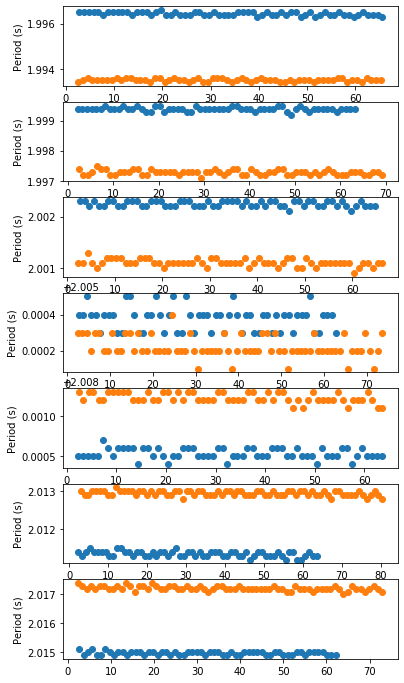

In [11]:
prefix = 'kater_2_run'
suffix = '.txt'

tup = []
tdown = []
dtup = []
dtdown = []

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(6,12)) 

for i in range(1,8):
    i2 = 2*i
    j = 2*i - 1
    fname1 = prefix + str(i2) + suffix
    fname2 = prefix + str(j) + suffix

    dfup = pd.read_csv(fname1,sep='\t')
    dfdown = pd.read_csv(fname2,sep='\t')
    
    timeup = np.array(dfup['Time'])
    periodup = []
    for k in range(2,len(timeup)):
        periodup.append(timeup[k]-timeup[k-2])
#         print(timeup[k])
    
    periodup=np.array(periodup)

    semup = periodup.std()/np.sqrt(len(periodup))
    print ("Periodup = %0.5f +/- %0.8f" % (periodup.mean(),semup))
    
    tup.append(periodup.mean())
    dtup.append(semup)
    
    timedown = np.array(dfdown['Time'])
    perioddown = []
    for k in range(2,len(timedown)):
        perioddown.append(timedown[k]-timedown[k-2])
    
    perioddown=np.array(perioddown)

    semdown = perioddown.std()/np.sqrt(len(perioddown))
    print ("Perioddown = %0.5f +/- %0.8f" % (perioddown.mean(),semdown))
    
    tdown.append(perioddown.mean())
    dtdown.append(semup)

    axs[i-1].plot(timeup[2:],periodup,'o')
    axs[i-1].plot(timedown[2:],perioddown,'o')
    axs[i-1].set_ylabel('Period (s)')
    
tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)

plt.show()

In [12]:
up = pd.DataFrame({'Xpos':xpos, 'Period':tup, 'dXpos':dxpos, 'dPeriod':dtup})
down = pd.DataFrame({'Xpos':xpos, 'Period':tdown, 'dXpos':dxpos, 'dPeriod':dtdown})

Coefficients (from curve_fit)
[1.99350442e+00 2.80858978e-03 3.17652678e-05]
Covariance Matrix (from curve_fit)
[[ 3.44064474e-08 -1.80812150e-08  1.99607107e-09]
 [-1.80812150e-08  1.10498147e-08 -1.30715053e-09]
 [ 1.99607107e-09 -1.30715053e-09  1.61683442e-10]]
Coefficients (from curve_fit)
[1.98942806e+00 3.85342244e-03 1.23215841e-05]
Covariance Matrix (from curve_fit)
[[ 2.32017152e-08 -1.21925481e-08  1.34595622e-09]
 [-1.21925481e-08  7.45091723e-09 -8.81394001e-10]
 [ 1.34595622e-09 -8.81394001e-10  1.09018871e-10]]


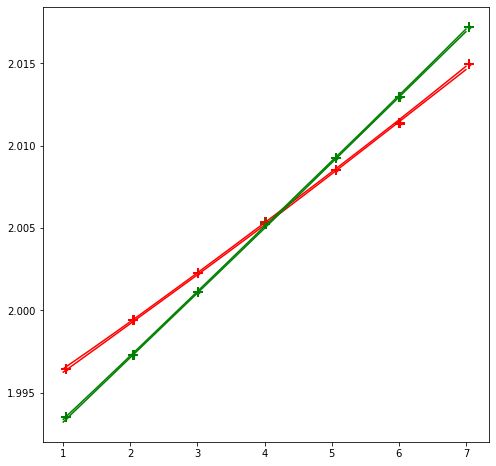

In [13]:
# Let's do linear fits using the curve_fit utility from scipy

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

#axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

#axs2.plot(xi,middle)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()

In [14]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

Period = 2.00597 +/- 0.00048


In [15]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.7972 +/- 0.0047


In [16]:
# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar
#
#g = 9.799 # value of g in Newport News
g = 9.8144

# Distance calculations
#
# The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
# The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
# The radius of the large mass is 4.753 cm
# The radius of the small mass is 3.498 cm
RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))
    
#print (l2,t1,t2)

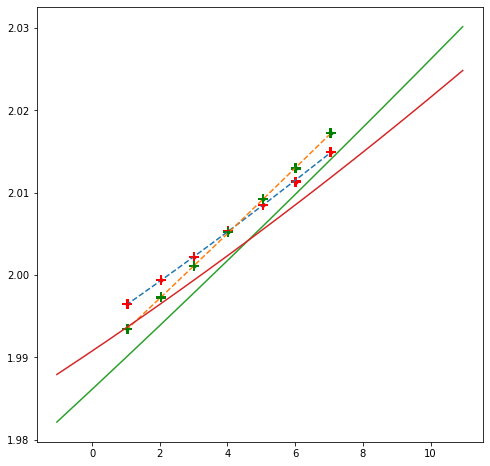

In [17]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu,'--')
#axs2.plot(xi,loweru,'r')
#axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled,'--')
#axs2.plot(xi,lowerd,'g')
#axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

axs2.plot(xpos,t1,label='Small Mass Down')
axs2.plot(xpos,t2,label='Small Mass Up')

plt.show()

Coefficients (from curve_fit)
[14.84031038]
Covariance Matrix (from curve_fit)
[[6.8739088e-05]]
Coefficients (from curve_fit)
[12.40158318]
Covariance Matrix (from curve_fit)
[[0.00012762]]


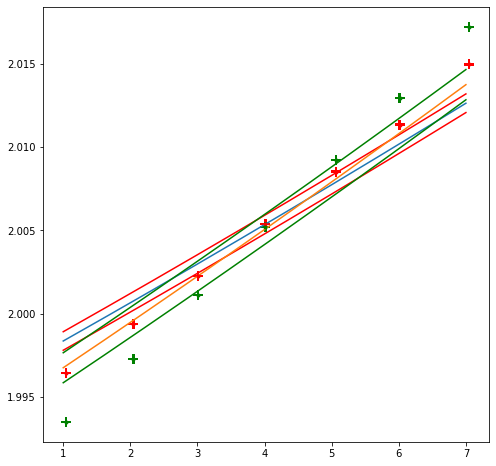

In [18]:
def theoryfitfunction1(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
#     fudge_factor = paramlist[1]
    fudge_factor=0.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.4
    offsetm = 0.1
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t1

def theoryfitfunction2(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
#     fudge_factor = paramlist[1]
    fudge_factor=0.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.4
    offsetm = 0.1
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t2

init_vals = [9.814]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(theoryfitfunction1,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([theoryfitfunction1(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [9.814]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(theoryfitfunction2,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([theoryfitfunction2(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()


In [19]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

Period = 2.00590 +/- 0.00729


In [20]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.7979 +/- 0.0712


In this case, with these sets of data, the best g-value is g = 9.7971 giving the least amount of error. A 0.3 difference in the offset of the fudge factor gives the best comparison.